In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the Autism Screening for Toddlers dataset
df = pd.read_csv('superstores.csv')#actual file path

# Simulate a time series by adding a timestamp (since the dataset lacks explicit time data)
date_rng = pd.date_range(start='2018-01-01', periods=len(df), freq='D')  # Daily frequency for demo
df['timestamp'] = date_rng
df.set_index('timestamp', inplace=True)



In [2]:
# Calculate Total_Score as the sum of A1 to A10 scores
df['Total_Score'] = df[['A1', 'A2', 'A3', 'A4', 'A5', 
                        'A6', 'A7', 'A8', 'A9', 'A10']].sum(axis=1)

# Clean data (handle any potential missing values)
df['Total_Score'] = df['Total_Score'].fillna(method='ffill').fillna(method='bfill').fillna(0)

# Ensure the time series has enough data for decomposition (minimum period for seasonality)
if len(df) < 12:  # Assuming monthly seasonality; adjust based on data
    raise ValueError("Dataset too small for seasonal decomposition. Need more data points.")
decomposition = seasonal_decompose(df['Total_Score'], model='additive', period=7)

C:\Users\Dhiya\AppData\Local\Temp\ipykernel_10972\347773626.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Total_Score'] = df['Total_Score'].fillna(method='ffill').fillna(method='bfill').fillna(0)


Text(0.5, 1.0, 'Original Time Series')

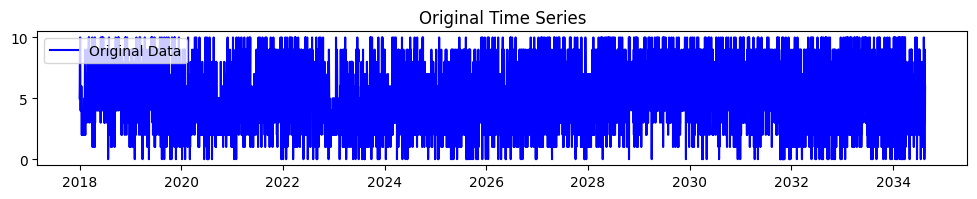

In [3]:
# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Total_Score'], label='Original Data', color='blue')
plt.legend(loc='upper left')
plt.title('Original Time Series')

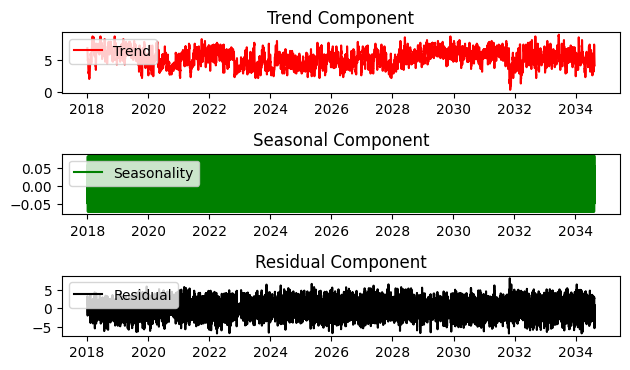

In [4]:
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='black')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()